<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jesusrincon1328/blob/main/Semana%207%20/Regresi%C3%B3n_y_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad Semanal - 7**

**Alumno:** Jesús Angel Rincón Ruiz

**Matricula:** A01793960

**Objetivos:**

Entender métodos de Regresiones y K means.

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


In [ ]:
X = df[["Number of Units"]]
y = df[["Manufacturing Cost"]]

In [ ]:
len (X)

1000

In [ ]:
y.describe()

,Manufacturing Cost
count,1000.000000
mean,40.052999
std,10.595322
min,20.000000
25%,32.912036
50%,38.345781
75%,44.531822
max,100.000000


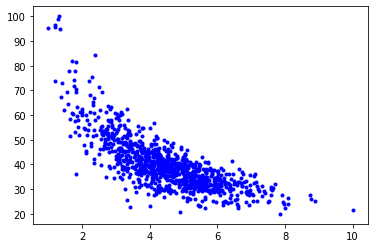

In [ ]:
plt.plot(X,y, "b.")

**1.1 Divide los datos del costo de manufactura.** 

Utiliza la función train_test_split (viene el ejemplo al final del notebook)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

**1.2 Regresión Lineal.**

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada. 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [ ]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
yhat = linear_reg.predict(X_train)
yhat[0:5]

array([[39.28239104],
       [45.34361759],
       [48.6471974 ],
       [33.00334836],
       [35.81416506]])

In [ ]:
linear_reg.intercept_

array([66.97622862])

In [ ]:
linear_reg.coef_

array([[-6.00034747]])

**Modelo generado** 

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

por lo que tendriamos:

**Manufacturing Cost** =  -6.218 x **Number of units** + 67.890 

**Visualización**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


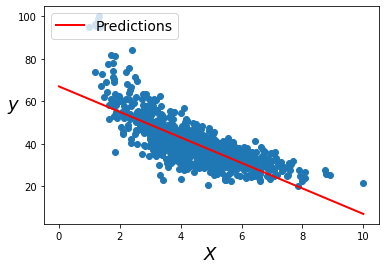

In [ ]:
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

**Errores y R^2**

In [ ]:
yhat_test = linear_reg.predict(X_test)
yhat_train = linear_reg.predict(X_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhat_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat_test)))
print('r2_score',r2_score(y_test, yhat_test))


Error medio Absoluto (MAE): 4.642590742422353
Root Mean Squared Error: 6.767304611023221
r2_score 0.5725182609536665


**Regresión Polinomial**

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly =  poly_features.fit_transform(X_test)


In [ ]:
X_train_poly

array([[  4.61537231,  21.30166155,  98.31509886],
       [  3.60522638,  12.99765728,  46.85949696],
       [  3.05466163,   9.3309577 ,  28.50291849],
       ...,
       [  1.62030979,   2.62540381,   4.2539675 ],
       [  6.09889652,  37.19653874, 226.85784059],
       [  3.18717054,  10.15805604,  32.37545696]])

In [ ]:
lin_reg_poly = LinearRegression(fit_intercept=True)
lin_reg_poly.fit(X_train_poly, y_train)
lin_reg_poly.coef_, lin_reg_poly.intercept_

(array([[-32.47619927,   4.66666739,  -0.2388345 ]]), array([110.87955456]))

**Modelo generado** 

$\hat{y} = 110.879 -32.476X + 4.666X^2  -0.238X^3

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


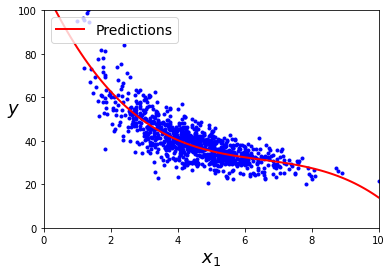

In [ ]:
X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg_poly.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

**Errores y R^2**

In [ ]:
y_poly_pred = lin_reg_poly.predict(X_test_poly)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_poly_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred)))
print('r2_score',r2_score(y_test, y_poly_pred))


Error medio Absoluto (MAE): 4.326897810390827
Root Mean Squared Error: 5.871683937053899
r2_score 0.6781811660294619


**Ridge y Lasso**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
#RIDGE

RidgeModel = Ridge(alpha =1)
RidgeModel.fit(X_train, y_train)
y_predict_ridge = RidgeModel.predict(X_test)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,y_predict_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge)))
print('r2_score',r2_score(y_test, y_predict_ridge))



Error medio Absoluto (MAE): 4.642319499964093
Root Mean Squared Error: 6.767480426464915
r2_score 0.5724960486043214


In [ ]:
RidgeModel.coef_,RidgeModel.intercept_


(array([[-5.99624726]]), array([66.95781558]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


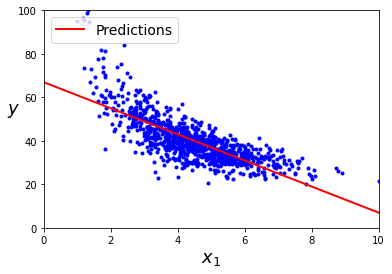

In [ ]:
X_ridge=np.linspace(0, 10, 100).reshape(100, 1)
y_ridge= RidgeModel.predict(X_ridge)


plt.plot(X, y, "b.")
plt.plot(X_ridge, y_ridge, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

In [ ]:
#LASSO


modelLasso = Lasso(alpha=0.02)
modelLasso.fit(X_train, y_train)
y_predict_lasso = modelLasso.predict(X_test)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,y_predict_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_lasso)))
print('r2_score',r2_score(y_test, y_predict_lasso))


Error medio Absoluto (MAE): 4.641872629230551
Root Mean Squared Error: 6.767782627882894
r2_score 0.5724578674270739


In [ ]:
modelLasso.coef_,modelLasso.intercept_

(array([-5.98940673]), array([66.92709644]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


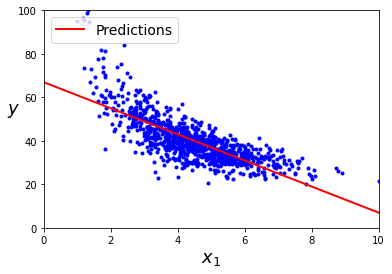

In [ ]:
X_lasso=np.linspace(0, 10, 100).reshape(100, 1)
y_lasso= RidgeModel.predict(X_lasso)


plt.plot(X, y, "b.")
plt.plot(X_lasso, y_lasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

DE acuerdo al resumen de Error y R^2

Lineal

Error medio Absoluto (MAE): 4.642590742422353
Root Mean Squared Error: 6.767304611023221
r2_score 0.5725182609536665

-------------------------------------------

Polinomial

Error medio Absoluto (MAE): 4.326897810390827
Root Mean Squared Error: 5.871683937053899
r2_score 0.6781811660294619

---------------------------------------------

Ridge

Error medio Absoluto (MAE): 4.642319499964093
Root Mean Squared Error: 6.767480426464915
r2_score 0.5724960486043214

--------------------------------------------
Lasso

Error medio Absoluto (MAE): 4.641872629230551
Root Mean Squared Error: 6.767782627882894
r2_score 0.5724578674270739


# Resultado

De acuerdo a los resultados el metodo que mas le coviene a la empresa es el **polinomial** ya que tiene un menor MEA y una **R^2 que describe el 67% de nuestros datos** mientras que para el modelo lineal, Ridge y Lasso esta por debajo del 60%.
El entrenamiento fue realizado con el 80% de los datos 

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14984,4136960010,20150327T000000,480000.0,5,3.50,3480,12821,2.0,0,2,...,10,2890,590,2004,0,98092,47.2641,-122.215,3400,9870
14107,2473002060,20140519T000000,442500.0,3,1.75,1800,10200,1.0,0,0,...,8,1800,0,1967,0,98058,47.4496,-122.146,2140,10128
1701,8080400045,20140620T000000,600000.0,2,1.00,1040,3600,1.0,0,0,...,7,1040,0,1919,1980,98112,47.6190,-122.311,2250,4800
5570,1735800050,20150409T000000,142500.0,1,1.00,690,6825,1.0,0,0,...,5,690,0,1917,0,98002,47.3109,-122.225,1330,5381
19601,522059189,20150417T000000,235000.0,3,1.00,1460,8400,1.0,0,0,...,7,1460,0,1958,0,98055,47.4243,-122.198,1460,9600
14852,5153200150,20141203T000000,345000.0,2,1.00,1770,16660,1.0,0,3,...,8,1220,550,1957,0,98023,47.3346,-122.354,2790,20504
9211,1726069198,20140918T000000,850000.0,3,2.50,3260,91911,2.0,0,0,...,9,3260,0,1984,0,98077,47.7370,-122.074,2520,65775
16293,5037300130,20150504T000000,672500.0,3,1.75,1580,5750,1.0,0,2,...,8,1330,250,1947,0,98199,47.6339,-122.392,2480,5750
7199,3820100284,20140827T000000,355000.0,3,3.00,1850,9600,1.0,0,0,...,7,1230,620,1981,0,98028,47.7717,-122.250,1970,10000
16143,2268000500,20140721T000000,229900.0,3,1.00,1440,11925,1.0,0,0,...,7,1440,0,1968,0,98003,47.2738,-122.300,1440,10425


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

In [ ]:
df.dtypes


price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

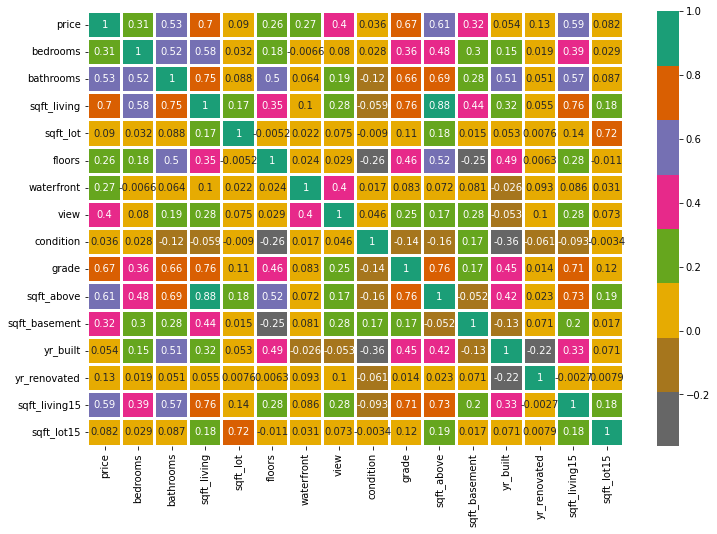

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [ ]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(y_test)

y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)



In [ ]:
ModeloLR = LinearRegression(fit_intercept=True)
ModeloLR.fit(X_train,y_train)
ModeloLR.coef_, ModeloLR.intercept_

(array([[-0.09808715,  0.08766871,  0.20426281,  0.0019498 ,  0.04692493,
          0.13295382,  0.08707801,  0.03799052,  0.38665787,  0.16969088,
          0.10626832, -0.2864496 ,  0.01470207,  0.05466431, -0.0412092 ]]),
 array([4.60255147e-16]))

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 702 kB/s 
     |████████████████████████████████| 1.0 MB 57.4 MB/s 
     |████████████████████████████████| 1.7 MB 38.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 51.6 MB/s 
     |████████████████████████████████| 6.3 MB 49.2 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=940303d6eb33431e3c302182d22dffa0bc0f71951cf0ac4de6ad42389930e9c7
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=61f42a066e526014fc1e92f88edcea8a482adbd47f255746df2c283dbc707fc6
  Stored in directory: /root/.

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

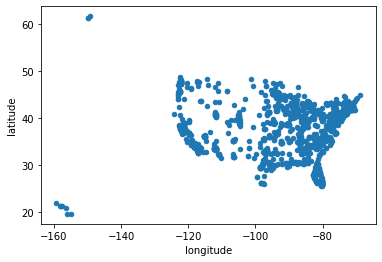

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.


In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [10]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [11]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [12]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

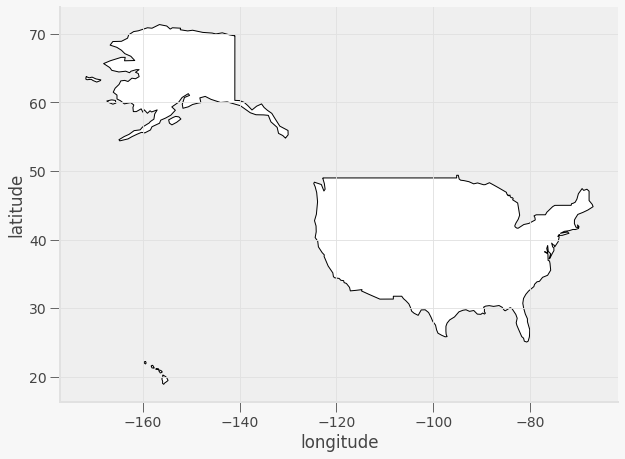

In [14]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

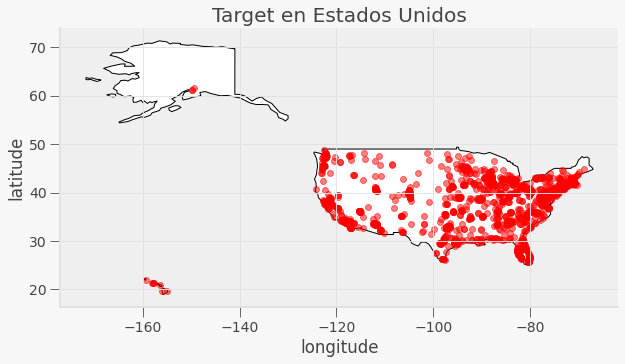

In [15]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [16]:
from sklearn.cluster import KMeans

In [17]:
wcss = []

for i in range (1,11):
     kmeans = KMeans(n_clusters = i, max_iter = 10000)
     kmeans.fit(latlong)
     wcss.append(kmeans.inertia_)

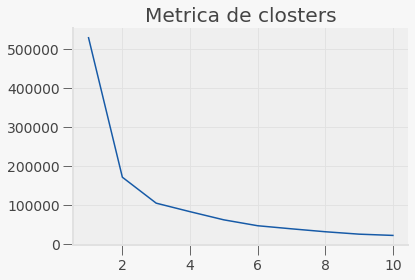

In [18]:
plt.plot(range(1,11),wcss)
plt.title("Metrica de closters")
plt.show()

De acuerdo a la grafica el numero optimo que se observa es 3

In [19]:
clustering = KMeans(n_clusters = 3, max_iter= 10000)
clustering.fit(latlong)

Optimal_centers =  pd.DataFrame(clustering.cluster_centers_)

print("Los centroides se encuentran en las siguientes coordenadas:\n", clustering.cluster_centers_)

latlong["Cluster"] = clustering.labels_

latlong

Los clusters óptimos se encuentran en las siguientes coordenadas:
 [[  37.48734203 -118.62447332]
 [  37.789554    -78.56990807]
 [  37.98006261  -93.3271723 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,latitude,longitude,Cluster
0,33.224225,-86.804174,2
1,33.334550,-86.989778,2
2,30.602875,-87.895932,2
3,34.560148,-86.971559,2
4,31.266061,-85.446422,1
...,...,...,...
1834,43.034293,-88.176840,2
1835,42.989604,-88.259806,2
1836,42.846799,-106.264166,0
1837,41.162019,-104.800048,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


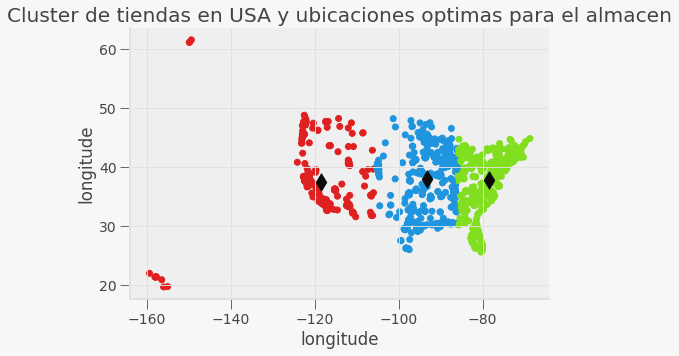

In [20]:
colors = ["#DF2020", "#81DF20", "#2095DF"]
latlong["colormap"] = latlong.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

Lat = pd.DataFrame(latlong["latitude"])
Long = pd.DataFrame(latlong["longitude"])
Clus = pd.DataFrame(latlong["colormap"])

plt.scatter(latlong.longitude, latlong.latitude, c=latlong.colormap)
plt.scatter(Optimal_centers[1], Optimal_centers[0], marker = "d", s=150, color= "#0A0A0A")
plt.gcf().set_size_inches((7.5,5))

plt.xlabel("longitude")
plt.ylabel("longitude")
plt.title("Cluster de tiendas en USA y ubicaciones optimas para el almacen")

plt.show()

**Encuentra el numero ideal de almacenes, justifica tu respuesta:**

Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?,¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?
¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

Las latitudes de los ideal para la instalación de los almacenes es:

[[  37.78260864  -78.5343898 ]
Ubicación: Scottsville District, Virginia, EE. UU.

 [  37.48734203 -118.62447332] Round Valley Joint Elementary, California 93514, EE. UU.

 [  37.98791364  -93.27994961]] Municipio de Cross Timbers, Misuri, EE. UU.


 El numero de almacenes fue seleccionado de acuerdo al grafica de codo.